# Ising Model

## construct a 3-qubit state

In [1]:
from qiskit.quantum_info import Statevector
import numpy as np
import pylatexenc

zero = Statevector([1,0])
print("zero	is", zero)
one = Statevector([0,1])

psi = one.tensor(zero.tensor(zero))
print('psi is', psi)

psi = one^zero^zero
psi.draw("latex")

psi = 1/np.sqrt(2) * (zero^zero^zero) + 1/np.sqrt(2) * (one^one^one)
psi.draw("latex")

zero	is Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
psi is Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

## Construct a Pauli state

In [2]:
from qiskit.quantum_info import Pauli

In [3]:
z0z1 = Pauli("ZZI")
print("z0z1 is", z0z1)
print('and its matrix is')
print(z0z1.to_matrix())

z0z1 is ZZI
and its matrix is
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [4]:
print('The sparse representation of z0z1 is')
print(z0z1.to_matrix(sparse=True))

The sparse representation of z0z1 is
<Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 8 stored elements and shape (8, 8)>
  Coords	Values
  (0, 0)	(1+0j)
  (1, 1)	(1+0j)
  (2, 2)	(-1+0j)
  (3, 3)	(-1+0j)
  (4, 4)	(-1+0j)
  (5, 5)	(-1+0j)
  (6, 6)	(1+0j)
  (7, 7)	(1+0j)


## Operate a Pauli state like Z or I

In [5]:
from qiskit.quantum_info import SparsePauliOp as PauliOp

In [6]:
H_cut = PauliOp(Pauli("ZZI")) + PauliOp(Pauli("ZIZ"))
print('H_cut is')
print(H_cut)
print('The sparse representation of H_cut is')
print(H_cut.to_matrix(sparse=True))

H_cut is
SparsePauliOp(['ZZI', 'ZIZ'],
              coeffs=[1.+0.j, 1.+0.j])
The sparse representation of H_cut is
<Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 8 stored elements and shape (8, 8)>
  Coords	Values
  (0, 0)	(2+0j)
  (1, 1)	0j
  (2, 2)	0j
  (3, 3)	(-2+0j)
  (4, 4)	(-2+0j)
  (5, 5)	0j
  (6, 6)	0j
  (7, 7)	(2+0j)


## Construct a linear combination of Hamiltonian

In [ ]:
psi = one^zero^zero
E = psi.expectation_value(H_cut)
print(E)

(-2+0j)


In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli
from qiskit.quantum_info.operators import Pauli
from qiskit.circuit.library import RZZGate, RXGate
import numpy as np


In [2]:
from qiskit_aer import AerSimulator

In [56]:
n_qubits = 3
qc = QuantumCircuit(n_qubits)

# 初始态：全 Hadamard 得到 |+⟩⊗3
qc.h(range(n_qubits))

# 得到初始状态向量
state = Statevector.from_instruction(qc)
state.draw('latex')  # 可视化（文本形式）


<IPython.core.display.Latex object>

In [57]:
gamma = 5.899

qc_cost = QuantumCircuit(n_qubits)
qc_cost.append(RZZGate(2 * gamma), [0, 1])  # Z0·Z1
qc_cost.append(RZZGate(2 * gamma), [0, 2])  # Z0·Z2

# 应用成本哈密顿量作用
state = state.evolve(qc_cost)
state.draw('latex')


<IPython.core.display.Latex object>

In [58]:
beta = 1.859

qc_mixer = QuantumCircuit(n_qubits)
for i in range(n_qubits):
    qc_mixer.rx(2 * beta, i)

# 应用混合哈密顿量作用
state = state.evolve(qc_mixer)
state.draw('latex')  # 查看最终状态向量


<IPython.core.display.Latex object>

In [59]:
# 定义 Z·Z Pauli 乘积项
ZZ_01 = Pauli('ZZI')
ZZ_02 = Pauli('ZIZ')

# 构造总哈密顿量算符（加法组合）
H_C = Operator(ZZ_01) + Operator(ZZ_02)

# 计算期望值
expectation = np.real(state.expectation_value(H_C))
print(f"期望能量 E(γ={gamma}, β={beta}): {expectation}")


期望能量 E(γ=5.899, β=1.859): -0.40244869223439284


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZZGate
from qiskit.quantum_info import Statevector, Operator, Pauli

# 定义 ZZ 哈密顿量
ZZ_01 = Pauli('ZZI')
ZZ_02 = Pauli('ZIZ')
H_C = Operator(ZZ_01) + Operator(ZZ_02)

# 扫描参数空间
gamma_list = np.linspace(0, 2*np.pi, 50)
beta_list = np.linspace(0, np.pi, 50)

expectation_grid = np.zeros((len(gamma_list), len(beta_list)))

for i, gamma in enumerate(gamma_list):
    for j, beta in enumerate(beta_list):
        n_qubits = 3
        
        # 初态 |+>⊗3
        qc_init = QuantumCircuit(n_qubits)
        qc_init.h(range(n_qubits))
        state = Statevector.from_instruction(qc_init)

        # 成本哈密顿量作用
        qc_cost = QuantumCircuit(n_qubits)
        qc_cost.append(RZZGate(2 * gamma), [0, 1])
        qc_cost.append(RZZGate(2 * gamma), [0, 2])
        state = state.evolve(qc_cost)

        # 混合哈密顿量作用
        qc_mixer = QuantumCircuit(n_qubits)
        for q in range(n_qubits):
            qc_mixer.rx(2 * beta, q)
        state = state.evolve(qc_mixer)

        # 计算期望能量
        E = np.real(state.expectation_value(H_C))
        expectation_grid[i, j] = E
min_idx = np.unravel_index(np.argmin(expectation_grid), expectation_grid.shape)
print(f"Minimum at γ={gamma_list[min_idx[0]]:.3f}, β={beta_list[min_idx[1]]:.3f}")
print(f'expected E = {E}')

Minimum at γ=5.899, β=1.859
expected E = 2.9995195653237143e-31


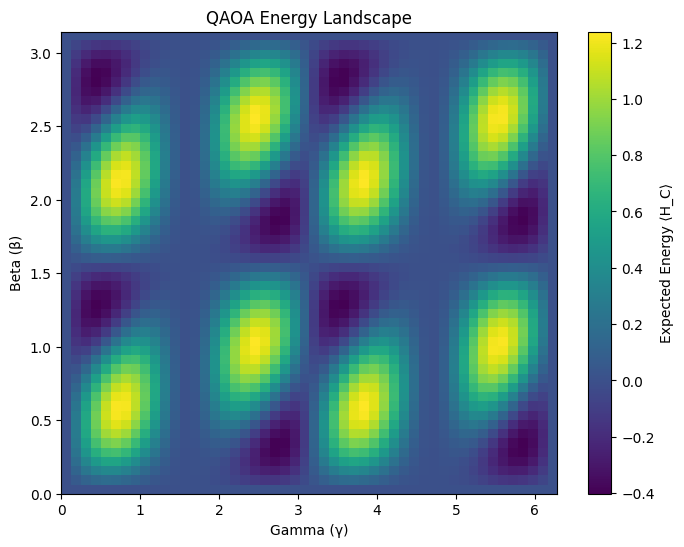

In [51]:
plt.figure(figsize=(8, 6))
plt.imshow(expectation_grid.T, extent=(0, 2*np.pi, 0, np.pi), origin='lower',
           aspect='auto', cmap='viridis')
plt.colorbar(label='Expected Energy ⟨H_C⟩')
plt.xlabel('Gamma (γ)')
plt.ylabel('Beta (β)')
plt.title('QAOA Energy Landscape')
plt.show()


